In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def randomduration(durationlist, num_call=1):
    '''
    return random duration of incoming call 
    '''
    return np.random.choice(durationlist,num_call)



def incomingcall(incominglist,random=True,num_call=1):
    '''
    return the time slot where incoming call would happen in range 0 to 3600
    '''
    if random:
        return sorted(np.random.choice(incominglist,num_call))
    else:
        return sorted(incominglist)

def abandon_call(abandonlist,num_call=1):
    '''
    return the duration of time before they abandon
    '''
    return np.random.choice(abandonlist,num_call)

In [4]:
from ipywidgets import FloatProgress
from IPython.display import display
import time

In [5]:
df=pd.read_excel("Raw data\\Call Duration and Incoming Call.xlsx")
df.head()

,Duration_EFTB,Duration_EGTB,Duration_EGIB,Duration_ELIB,Duration_ELBB,Duration_EGBB,IncomingCall_EFTB,IncomingCall_EGTB,IncomingCall_EGIB,IncomingCall_ELIB,IncomingCall_ELBB,IncomingCall_EGBB,AbandonCall_EFTB,AbandonCall_EGTB,AbandonCall_EGIB,AbandonCall_ELIB,AbandonCall_ELBB,AbandonCall_EGBB
0,177.0,396.0,121.0,585.0,133.0,581.0,1956.0,1889.0,2430.0,1990.0,3519,3211.0,31.0,44.0,58.0,7.0,88.0,81.0
1,328.0,205.0,514.0,600.0,173.0,242.0,2126.0,1945.0,2472.0,2151.0,61,3387.0,89.0,53.0,47.0,51.0,81.0,8.0
2,296.0,229.0,97.0,280.0,581.0,76.0,2166.0,2023.0,2703.0,2355.0,695,394.0,22.0,90.0,89.0,86.0,90.0,173.0
3,347.0,722.0,288.0,136.0,266.0,148.0,2302.0,2038.0,2803.0,2386.0,727,623.0,25.0,58.0,48.0,88.0,89.0,88.0
4,5.0,135.0,91.0,538.0,182.0,92.0,2561.0,2094.0,2934.0,2887.0,731,700.0,87.0,48.0,91.0,94.0,92.0,180.0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88344 entries, 0 to 88343
Data columns (total 3 columns):
Duration        76871 non-null float64
IncomingCall    88344 non-null int64
AbandonCall     7349 non-null float64
dtypes: float64(2), int64(1)
memory usage: 2.0 MB


In [146]:
np.nan

nan

In [7]:
duration_eftb=df['Duration_EFTB'].dropna().tolist()
duration_egtb=df['Duration_EGTB'].dropna().tolist()
duration_egib=df['Duration_EGIB'].dropna().tolist()
duration_elib=df['Duration_ELIB'].dropna().tolist()
duration_elbb=df['Duration_ELBB'].dropna().tolist()
duration_egbb=df['Duration_EGBB'].dropna().tolist()
incomingcall_eftb=df['IncomingCall_EFTB'].dropna().tolist()
incomingcall_egtb=df['IncomingCall_EGTB'].dropna().tolist()
incomingcall_egib=df['IncomingCall_EGIB'].dropna().tolist()
incomingcall_elib=df['IncomingCall_ELIB'].dropna().tolist()
incomingcall_elbb=df['IncomingCall_ELBB'].dropna().tolist()
incomingcall_egbb=df['IncomingCall_EGBB'].dropna().tolist()
abandoncall_eftb=df['AbandonCall_EFTB'].dropna().tolist()
abandoncall_egtb=df['AbandonCall_EGTB'].dropna().tolist()
abandoncall_egib=df['AbandonCall_EGIB'].dropna().tolist()
abandoncall_elib=df['AbandonCall_ELIB'].dropna().tolist()
abandoncall_elbb=df['AbandonCall_ELBB'].dropna().tolist()
abandoncall_egbb=df['AbandonCall_EGBB'].dropna().tolist()

In [8]:
def simulation_model(model='EFTB',incominglist, durationlist, num_call, abandonlist, max_agent=24, numcall_follow_poisson=False):
    
    if model=='EFTB':
        outboundprob=0.121791944
    elif model=='EGTB':
        outboundprob=0.186733855
    elif model=='ELIB':
        outboundprob=0.187724043
    elif model=='EGIB':
        outboundprob=0.276736414
    elif model=='ELBB':
        outboundprob=0.005098475
    elif model=='EGBB':
        outboundprob=0.013711384


    
    
    #If true, numcall will based on poisson instead of prediction
    if numcall_follow_poisson:
        numcall=np.random.poisson(numcall,1)
    
    #offeredcallinonehour. Must be constant for every agent testing
    offered_call=incomingcall(incominglist,num_call=num_call)
    random_duration=randomduration(durationlist, num_call=numcall)+offered_call+np.round(np.random.uniform(15,45,1))
    
    #Simulate for all the number of agent
    abandon_per_agent={}
    final_waitinglist_per_agent={}
    
    
    for agent in range(max_agent):
        #time agent start conversation. If no conversation, it reset to 0
        agent_work=np.zeros(agent+1)
        #time agent finish conversation
        agent_time=np.zeros(agent+1)
        #Initiate waitinglist and time to abandon list variable
        waitinglist=[]
        time_to_abandon=[]
        abdn_cust=[]
        #print("Agent :",agent+1)
        #time arrival for incoming call
        for idxcall,call in enumerate(offered_call):
            #print("The Call:",call)
            #update the status of agent work. Assign the waitinglist to free agent
            #Sort the agent based on who finish first
            sort_index_agent_time=np.argsort(agent_time)
            agent_time=agent_time[sort_index_agent_time]
            agent_work=agent_work[sort_index_agent_time]
            for index,finishtime in enumerate(agent_time):
                #if agent already finish the conversation at the arrival the call. Reset to 0
                
                if finishtime < call:
                    agent_work[index]=0
                    agent_time[index]=0
                    #Assign the waiting list to this call.Below function mean customer not abandon yet
                    #Test whether there are people in waiting list or not
                    try:
                        #See if customer not abandon yet and assign it to the free staf
                        if time_to_abandon[0]>finishtime:
                            waitinglist.pop(0)
                            time_to_abandon.pop(0)
                            agent_work[index]=finishtime
                            agent_time[index]=finishtime+randomduration(durationlist)+np.round(np.random.uniform(15,45,1))
                    except IndexError:
                        continue
                    
                    
            #update time to abandon and waiting list
            if bool(time_to_abandon):
                for cust in time_to_abandon:
                    if cust<call:
                        #Store the abandon customer and remove the abandon customer from waitinglist.Always the first waiting list abandon
                        abdn_cust.append(waitinglist.pop(0))
                        time_to_abandon.pop(0)
                        #print("len abndon customer",abdn_cust)
            
            
            #checking if there are free agent
            if np.min(agent_work)==0:
                #if no one in waiting list. Assign to agent
                if len(waitinglist)==0:
                    #assign the free agent with incoming call
                    free_agent=np.argmin(agent_work)
                    agent_work[free_agent]=call
                    #assign the time agent finish the conversation
                    agent_time[free_agent]=random
                    #print("agent_time",agent_time)
            #if no free agent. Assign to the waitinglist
            else:
                #time when customer start onhold
                waitinglist.append(call)
                #time when customer abandon the call. It should have same length 
                time_to_abandon.append(call+abandon_call(abandonlist))
                
            
        #update abandon customer after 1 hour
        if bool(time_to_abandon):
            for cust in time_to_abandon:
                #for 1 hour
                if cust<3600:
                    #Store the abandon customer and remove the abandon customer from waitinglist.Always the first waiting list abandon
                    abdn_cust.append(waitinglist.pop(0))
                    time_to_abandon.pop(0)
            
            
        abandon_per_agent[agent+1]=abdn_cust
        final_waitinglist_per_agent[agent+1]=waitinglist
        
    return abandon_per_agent,final_waitinglist_per_agent,offered_call

In [10]:
a,b,c=simulation_model(incomingcall_eftb, duration_eftb, 20, abandoncall_eftb, max_agent=22, numcall_follow_poisson=False)
print(c)
for item in a.keys():
    print(item,":",len(a[item]))
    print(a[item])

[59.0, 411.0, 520.0, 621.0, 692.0, 761.0, 918.0, 1360.0, 2071.0, 2248.0, 2317.0, 2415.0, 2418.0, 2442.0, 2445.0, 2499.0, 3022.0, 3276.0, 3324.0, 3599.0]
1 : 13
[411.0, 520.0, 621.0, 692.0, 761.0, 1360.0, 2248.0, 2317.0, 2415.0, 2418.0, 2442.0, 2445.0, 3324.0]
2 : 7
[692.0, 2317.0, 2415.0, 2418.0, 2442.0, 2445.0, 3324.0]
3 : 4
[761.0, 2418.0, 2442.0, 2499.0]
4 : 2
[2442.0, 2445.0]
5 : 2
[2442.0, 2445.0]
6 : 0
[]
7 : 0
[]
8 : 0
[]
9 : 0
[]
10 : 0
[]
11 : 0
[]
12 : 0
[]
13 : 0
[]
14 : 0
[]
15 : 0
[]
16 : 0
[]
17 : 0
[]
18 : 0
[]
19 : 0
[]
20 : 0
[]
21 : 0
[]
22 : 0
[]


In [27]:
def number_of_simulation(n_simulation,incominglist, durationlist, num_call, abandonlist, max_agent=24,  numcall_follow_poisson=False):
    Agents=np.zeros(max_agent)
    max_count = n_simulation

    f = FloatProgress(min=0, max=max_count) # instantiate the bar
    display(f) # display the bar
    
    #Repeat the simulation model based on n_simulation
    for simulation in range(n_simulation):
        abandon_per_agent,final_waitinglist_per_agent,offered_call=simulation_model(incominglist, durationlist, num_call,abandonlist,max_agent=max_agent, numcall_follow_poisson=numcall_follow_poisson)
        #For each agent dictionary 1 to max
        for agent in abandon_per_agent.keys():
            Agents[agent-1]=Agents[agent-1]+len(abandon_per_agent[agent])
        f.value += 1 # signal to increment the progress bar
    avg_abandon_per_agent=Agents/n_simulation
    avg_abandon_percentage_per_agent=(Agents/num_call)/n_simulation
    
    
   
    
    
    return avg_abandon_per_agent, avg_abandon_percentage_per_agent

In [87]:
test={}
for item in [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]:
    a,b=number_of_simulation(1000,incomingcall_eftb, duration_eftb,item,abandoncall_eftb, max_agent=24, numcall_follow_poisson=False)
    test[item]=b
data_simulation=pd.DataFrame(test)
data_simulation.to_excel('test.xlsx', index=False)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

In [81]:
data_simulation

,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150
0,0.404,0.5115,0.579667,0.63875,0.6736,0.695000,0.727286,0.755000,0.775222,0.7816,0.795000,0.805417,0.807538,0.819643,0.834667
1,0.156,0.3070,0.386000,0.45850,0.4994,0.537167,0.589571,0.601625,0.634667,0.6448,0.671273,0.687333,0.701385,0.720929,0.719267
2,0.030,0.1540,0.254000,0.33675,0.3808,0.430333,0.473857,0.497000,0.537556,0.5588,0.574182,0.598417,0.618769,0.638929,0.636933
3,0.003,0.0625,0.148667,0.23200,0.2868,0.330833,0.378571,0.411625,0.448444,0.4808,0.498273,0.519667,0.534077,0.547000,0.567533
4,0.000,0.0255,0.077000,0.14500,0.2018,0.255000,0.302857,0.339125,0.372111,0.3982,0.425636,0.456917,0.483769,0.497071,0.505733
5,0.000,0.0045,0.026667,0.08425,0.1382,0.191333,0.238286,0.274250,0.307889,0.3402,0.370818,0.389583,0.419308,0.440571,0.454533
6,0.000,0.0000,0.010667,0.04200,0.0842,0.131167,0.172143,0.214125,0.252000,0.2851,0.312909,0.341583,0.368615,0.382714,0.412067
7,0.000,0.0005,0.004667,0.01575,0.0496,0.088333,0.125429,0.162375,0.199667,0.2374,0.259364,0.291250,0.310769,0.343071,0.358867
8,0.000,0.0000,0.000333,0.00725,0.0256,0.053000,0.082429,0.118875,0.155111,0.1913,0.217000,0.244500,0.269000,0.297786,0.320400
9,0.000,0.0000,0.000333,0.00175,0.0142,0.026000,0.054286,0.087625,0.123111,0.1496,0.178364,0.207667,0.237000,0.248643,0.278267


In [82]:
test={}
for item in [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]:
    a,b=number_of_simulation(100,incomingcall_egtb, duration_egtb,item,abandoncall_egtb, max_agent=24, numcall_follow_poisson=False)
    test[item]=b
data_simulation=pd.DataFrame(test)
data_simulation.to_excel('test2.xlsx', index=False)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

In [83]:
test={}
for item in [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]:
    a,b=number_of_simulation(100,incomingcall_egib, duration_egib,item,abandoncall_egib, max_agent=24, numcall_follow_poisson=False)
    test[item]=b
data_simulation=pd.DataFrame(test)
data_simulation.to_excel('test3.xlsx', index=False)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

In [84]:
test={}
for item in [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]:
    a,b=number_of_simulation(100,incomingcall_elib, duration_elib,item,abandoncall_elib, max_agent=24, numcall_follow_poisson=False)
    test[item]=b
data_simulation=pd.DataFrame(test)
data_simulation.to_excel('test4.xlsx', index=False)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

In [85]:
test={}
for item in [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]:
    a,b=number_of_simulation(100,incomingcall_elbb, duration_elbb,item,abandoncall_elbb, max_agent=24, numcall_follow_poisson=False)
    test[item]=b
data_simulation=pd.DataFrame(test)
data_simulation.to_excel('test5.xlsx', index=False)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

In [86]:
test={}
for item in [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]:
    a,b=number_of_simulation(100,incomingcall_egbb, duration_egbb,item,abandoncall_egbb, max_agent=24, numcall_follow_poisson=False)
    test[item]=b
data_simulation=pd.DataFrame(test)
data_simulation.to_excel('tes6t.xlsx', index=False)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

In [304]:
def testing(incominglist, durationlist, num_call, max_agent=24, ABANDON_TIME=30, numcall_follow_poisson=False):
    
    #If true, numcall will based on poisson instead of prediction
    if numcall_follow_poisson:
        numcall=np.random.poisson(numcall,1)
    
    #offeredcallinonehour. Must be constant for every agent testing
    offered_call=incomingcall(incominglist,num_call=num_call)
    
    
    #Simulate for all the number of agent
    abandon_per_agent={}
    final_waitinglist_per_agent={}
    
    agent=max_agent
    agent_work=np.zeros(agent+1)
    #time agent finish conversation
    agent_time=np.zeros(agent+1)
    #Initiate waitinglist and time to abandon list variable
    waitinglist=[]
    time_to_abandon=[]
    abdn_cust=[]
    print("Agent :",agent+1)
    #time arrival for incoming call
    for call in offered_call:
        print("The Call:",call)
        #update the status of agent work. Assign the waitinglist to free agent
        #Sort the agent based on who finish first
        sort_agent_time=np.argsort(agent_time)
        agent_work=agent_work[sort_agent_time]
        agent_time=agent_time[sort_agent_time]
        for index,finishtime in enumerate(agent_time):
            #if agent already finish the conversation at the arrival the call. Reset to 0

            if finishtime < call:
                agent_work[index]=0
                agent_time[index]=0
                #Assign the waiting list to this call.Below function mean customer not abandon yet
                #Test whether there are people in waiting list or not
                try:
                    #See if customer not abandon yet and assign it to the free staf
                    if time_to_abandon[0]>finishtime:
                        waitinglist.pop(0)
                        time_to_abandon.pop(0)
                        agent_work[index]=finishtime
                        agent_time[index]=finishtime+randomduration(durationlist)
                except IndexError:
                    continue


        #update time to abandon and waiting list
        if bool(time_to_abandon):
            for cust in time_to_abandon:
                if cust<call:
                    #Store the abandon customer and remove the abandon customer from waitinglist.Always the first waiting list abandon
                    abdn_cust.append(waitinglist.pop(0))
                    time_to_abandon.pop(0)
                    #print("len abndon customer",abdn_cust)


        #checking if there are free agent
        print("free person?  ",agent_work)
        if np.min(agent_work)==0:
            #if no one in waiting list. Assign to agent
            if len(waitinglist)==0:
                #assign the free agent with incoming call
                free_person=np.argmin(agent_work)
                agent_work[free_person]=call
                #assign the time agent finish the conversation
                agent_time[free_person]=call+randomduration(durationlist)
                print("agent work",agent_work)
                print("agent_time",agent_time)
        #if no free agent. Assign to the waitinglist
        else:
            #time when customer start onhold
            waitinglist.append(call)
            print("waiting list", waitinglist)
            #time when customer abandon the call. It should have same length 
            time_to_abandon.append(call+ABANDON_TIME)
            print("Time to abandon",time_to_abandon)


    #update abandon customer after 1 hour
    if bool(time_to_abandon):
        for cust in time_to_abandon:
            #for 1 hour
            if cust<3600:
                #Store the abandon customer and remove the abandon customer from waitinglist.Always the first waiting list abandon
                abdn_cust.append(waitinglist.pop(0))
                time_to_abandon.pop(0)


    abandon_per_agent[agent+1]=abdn_cust
    final_waitinglist_per_agent[agent+1]=waitinglist

    return abandon_per_agent,final_waitinglist_per_agent,offered_call,

In [32]:
EFTB=pd.read_excel("Raw data\\simulation testing data.xlsx", sheetname='EFTB')
EGTB=pd.read_excel("Raw data\\simulation testing data.xlsx", sheetname='EGTB')
EGIB=pd.read_excel("Raw data\\simulation testing data.xlsx", sheetname='EGIB')
ELIB=pd.read_excel("Raw data\\simulation testing data.xlsx", sheetname='ELIB')
ELBB=pd.read_excel("Raw data\\simulation testing data.xlsx", sheetname='ELBB')
EGBB=pd.read_excel("Raw data\\simulation testing data.xlsx", sheetname='EGBB')

In [36]:
EFTB=EFTB[EFTB.AC_EFTB==0]
EFTB=EFTB[EFTB.OC_EFTB!=0]
EGTB=EGTB[EGTB.AC_EGTB==0]
EGTB=EGTB[EGTB.OC_EGTB!=0]
EGIB=EGIB[EGIB.AC_EGIB==0]
EGIB=EGIB[EGIB.OC_EGIB!=0]
ELIB=ELIB[ELIB.AC_ELIB==0]
ELIB=ELIB[ELIB.OC_ELIB!=0]
ELBB=ELBB[ELBB.AC_ELBB==0]
ELBB=ELBB[ELBB.OC_ELBB!=0]
EGBB=EGBB[EGBB.AC_EGBB==0]
EGBB=EGBB[EGBB.OC_EGBB!=0]

In [37]:
EFTB.head()

,Date,OC_EFTB,AC_EFTB,HC_EFTB
0,2018/03/19 08,17,0,14
1,2018/03/19 09,60,0,20
2,2018/03/19 10,68,0,18
11,2018/03/20 08,13,0,11
21,2018/03/20 18,7,0,4


In [43]:
EFTB['HC_suggestion']=EFTB['OC_EFTB'].apply(lambda x: np.argmin(number_of_simulation(10,incomingcall_eftb, duration_eftb, x, abandoncall_eftb, max_agent=24,  numcall_follow_poisson=False)[0])+1)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

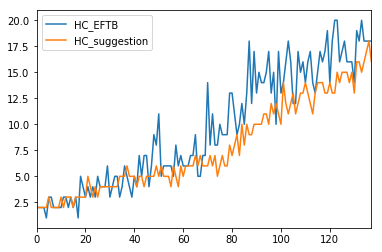

In [51]:
EFTB.sort_values('OC_EFTB').plot(x=np.arange(138),y=['HC_EFTB','HC_suggestion'])#

In [49]:
EGTB['HC_suggestion']=EGTB['OC_EGTB'].apply(lambda x: np.argmin(number_of_simulation(10,incomingcall_egtb, duration_egtb, x, abandoncall_egtb, max_agent=24,  numcall_follow_poisson=False)[0])+1)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

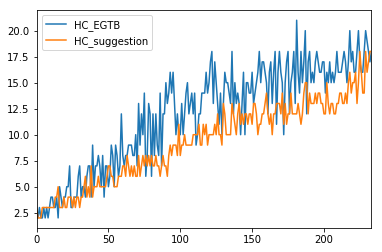

In [57]:
EGTB.sort_values('OC_EGTB').plot(x=np.arange(234),y=['HC_EGTB','HC_suggestion'])

In [52]:
EGIB['HC_suggestion']=EGIB['OC_EGIB'].apply(lambda x: np.argmin(number_of_simulation(10,incomingcall_egib, duration_egib, x, abandoncall_egib, max_agent=24,  numcall_follow_poisson=False)[0])+1)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

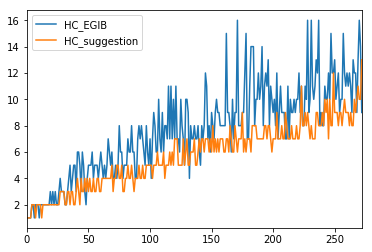

In [61]:
EGIB.sort_values('OC_EGIB').plot(x=np.arange(EGIB.shape[0]),y=['HC_EGIB','HC_suggestion'])

In [53]:
ELIB['HC_suggestion']=ELIB['OC_ELIB'].apply(lambda x: np.argmin(number_of_simulation(10,incomingcall_elib, duration_elib, x, abandoncall_elib, max_agent=24,  numcall_follow_poisson=False)[0])+1)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

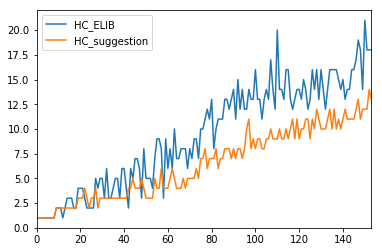

In [62]:
ELIB.sort_values('OC_ELIB').plot(x=np.arange(ELIB.shape[0]),y=['HC_ELIB','HC_suggestion'])

In [65]:
ELBB['HC_suggestion']=ELBB['OC_ELBB'].apply(lambda x: np.argmin(number_of_simulation(100,incomingcall_elbb, duration_elbb, x, abandoncall_elbb, max_agent=24,  numcall_follow_poisson=False)[0])+1)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

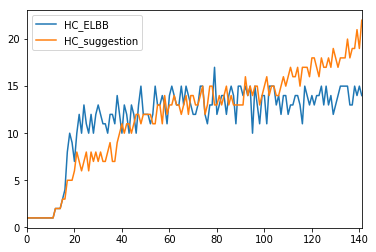

In [66]:
ELBB.sort_values('OC_ELBB').plot(x=np.arange(ELBB.shape[0]),y=['HC_ELBB','HC_suggestion'])

In [55]:
EGBB['HC_suggestion']=EGBB['OC_EGBB'].apply(lambda x: np.argmin(number_of_simulation(10,incomingcall_egbb, duration_egbb, x, abandoncall_egbb, max_agent=24,  numcall_follow_poisson=False)[0])+1)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

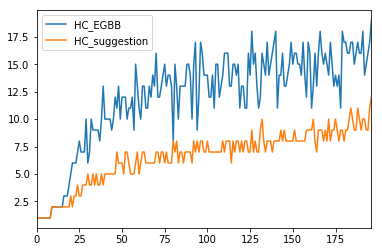

In [64]:
EGBB.sort_values('OC_EGBB').plot(x=np.arange(EGBB.shape[0]),y=['HC_EGBB','HC_suggestion'])

In [70]:
EFTB.to_excel('Headcount suggestion - EFTB.xlsx', index=False)
EGTB.to_excel('Headcount suggestion - EGTB.xlsx', index=False)
EGIB.to_excel('Headcount suggestion - EGIB.xlsx', index=False)
ELIB.to_excel('Headcount suggestion - ELIB.xlsx', index=False)
ELBB.to_excel('Headcount suggestion - ELBB.xlsx', index=False)
EGBB.to_excel('Headcount suggestion - EGBB.xlsx', index=False)

In [72]:
df_all=pd.read_excel("Raw data\\Call Duration and Incoming Call.xlsx", sheetname='All')

In [74]:
duration_all=df_all['Duration'].dropna().tolist()

incomingcall_all=df_all['IncomingCall'].dropna().tolist()

abandoncall_all=df_all['AbandonCall'].dropna().tolist()


In [75]:
ALL=pd.read_excel("Raw data\\simulation testing data.xlsx", sheetname='All')

In [77]:
ALL=ALL[ALL.AC==0]
ALL=ALL[ALL.OC!=0]

In [78]:
ALL['HC_suggestion']=ALL['OC'].apply(lambda x: np.argmin(number_of_simulation(100,incomingcall_all, duration_all, x, abandoncall_all, max_agent=24,  numcall_follow_poisson=False)[0])+1)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

KeyboardInterrupt: 